# COVID19-India-Analysis [Kaggle Notebook](https://www.kaggle.com/samacker77k/covid19-india-analysis)
A notebook dedicated to data visualization and analysis of COVID19 Pandemic in India.

---

This notebook visualizes the effects of COVID19 pandemic in India to help understand the effect of the outbreak demographically.

Maintained by:
* Shivani Tyagi [LinkedIn](https://www.linkedin.com/in/shivani-tyagi-09/) [Github](https://github.com/shivitg)
* Nitika Kamboj [LinkedIn](https://linkedin.com/in/nitika-kamboj) [Github](https://github.com/nitika-kamboj)
* Samar Srivastava [LinkedIn](https://linkedin.com/in/samacker77l) [Github](https://github.com/samacker77)
 


---

### Fetching Data 
---

In [42]:
import requests
import pandas as pd
import logging
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=1.4)

### Enable logging

In [2]:
loggers = {}

def get_logger(name):
    
    global loggers

    if loggers.get(name):
        return loggers.get(name)
    else:
        logger = logging.getLogger(name)
        logger.setLevel(logging.DEBUG)
        now = datetime.datetime.now()
        handler = logging.StreamHandler()
        formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        loggers[name] = logger
        return logger
    
logger = get_logger('COVID19 India Analysis Logger')

In [3]:
def fetch_data():
    url = 'http://portal.covid19india.org/export?_export=json'
    response = requests.get(url=url)
    if response.status_code == 200:
        logger.info('Connection enabled. Fetching data...')
        fetched_data = response.json()
        data = pd.DataFrame(fetched_data)
        print("Data fetched.")
        return data
    else:
        print('Connection failed. Please retry.')
        return

In [4]:
data = fetch_data()

2020-03-25 23:25:09,163 INFO Connection enabled. Fetching data...


Data fetched.


---
#### Now we have fetched data successfully. Now we will inspect the data. 

In [5]:
print("Data Shape ~ Rows = {} | Columns = {}".format(data.shape[0],data.shape[1]))

Data Shape ~ Rows = 544 | Columns = 19


#### Checking dtypes

In [6]:
data.dtypes

ID                       int64
Unique id               object
Government id           object
Diagnosed date          object
Age                    float64
Gender                  object
Detected city           object
Detected city pt        object
Detected district       object
Detected state          object
Nationality             object
Current status          object
Status change date      object
Notes                   object
Current location        object
Current location pt     object
Created on              object
Updated on              object
Contacts                object
dtype: object

> On first look we see that the attributes 'ID' and 'Unique ID' are same. So we check if they have any values that are different. Before that we convert 'Unique ID' to int64 and compare. 

In [7]:
data['Unique id'] = data['Unique id'].astype('int64')

In [8]:
data[data['ID'] == data['Unique id']]

,ID,Unique id,Government id,Diagnosed date,Age,Gender,Detected city,Detected city pt,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Current location,Current location pt,Created on,Updated on,Contacts
0,1,1,KL-TS-P1,30/Jan/2020,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (76.21325419999999 10.5256264),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
1,2,2,KL-AL-P1,02/Feb/2020,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (76.333482 9.498000100000001),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
2,3,3,KL-KS-P1,03/Feb/2020,NaN,Unknown,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
3,4,4,DL-P1,02/Mar/2020,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,03/15/2020,"Travelled from Austria, Italy.\nTravel history...",None,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,"Patient 22:, Patient 23:, Patient 24:, Patient..."
4,5,5,TS-P1,02/Mar/2020,NaN,Unknown,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,03/02/2020,"Travelled from Dubai, Singapore contact.\nTrav...",None,SRID=4326;POINT (78.4349398685041 17.4263524),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,540,540,None,24/Mar/2020,NaN,Unknown,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),None,Maharashtra,None,Hospitalized,03/24/2020,Details awaited,None,SRID=4326;POINT (72.8353355 18.9387711),03/24/2020 4:54 p.m.,03/24/2020 4:54 p.m.,None
540,541,541,None,24/Mar/2020,NaN,Unknown,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),None,Maharashtra,None,Hospitalized,03/24/2020,Details awaited,None,SRID=4326;POINT (72.8353355 18.9387711),03/24/2020 4:54 p.m.,03/24/2020 4:54 p.m.,None
541,542,542,None,24/Mar/2020,NaN,Unknown,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),None,Maharashtra,None,Hospitalized,03/24/2020,Details awaited,None,SRID=4326;POINT (72.8353355 18.9387711),03/24/2020 4:54 p.m.,03/24/2020 4:54 p.m.,None
542,543,543,None,24/Mar/2020,NaN,Unknown,Ahmednagar,SRID=4326;POINT (74.85802430085195 19.1627725),None,Maharashtra,None,Hospitalized,03/24/2020,Details awaited,None,SRID=4326;POINT (74.85802430085195 19.1627725),03/24/2020 4:54 p.m.,03/24/2020 4:54 p.m.,None


> Since we have same values in both columns. We can drop one of them and make another as the index

In [9]:
data.drop('Unique id',axis=1,inplace=True)

In [10]:
data.set_index('ID',inplace=True)

In [11]:
print("Data Shape ~ Rows = {} | Columns = {}".format(data.shape[0],data.shape[1]))

Data Shape ~ Rows = 544 | Columns = 17


In [12]:
data.head()

,Government id,Diagnosed date,Age,Gender,Detected city,Detected city pt,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Current location,Current location pt,Created on,Updated on,Contacts
ID,,,,,,,,,,,,,,,,,
1,KL-TS-P1,30/Jan/2020,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (76.21325419999999 10.5256264),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
2,KL-AL-P1,02/Feb/2020,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (76.333482 9.498000100000001),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
3,KL-KS-P1,03/Feb/2020,NaN,Unknown,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
4,DL-P1,02/Mar/2020,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,03/15/2020,"Travelled from Austria, Italy.\nTravel history...",None,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,"Patient 22:, Patient 23:, Patient 24:, Patient..."
5,TS-P1,02/Mar/2020,NaN,Unknown,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,03/02/2020,"Travelled from Dubai, Singapore contact.\nTrav...",None,SRID=4326;POINT (78.4349398685041 17.4263524),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None


#### Now the data is ready for analysis and preprocessing

> Graph between the count of affected people and Nationality.

In [13]:
data['Nationality'].value_counts()

India             316
Italy              18
Indonesia          10
United Kingdom      7
Indian              2
Thailand            2
Phillipines         2
Canada              1
Name: Nationality, dtype: int64

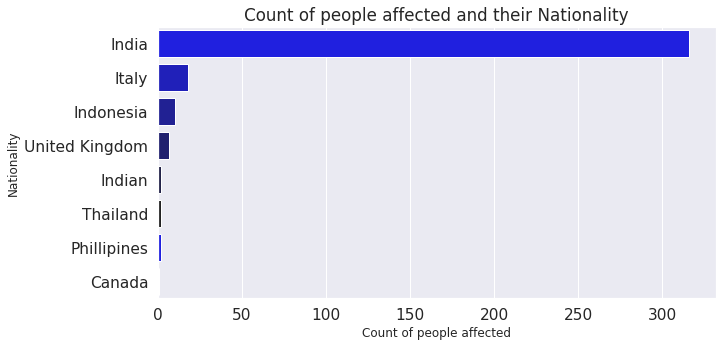

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(data['Nationality'].value_counts().values,data['Nationality'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of people affected and their Nationality')
plt.xlabel('Count of people affected', fontsize=12)
plt.ylabel('Nationality', fontsize=12)
plt.show()

> We can see from above graph that 'India' and 'Indian' are same nationality. We can replace 'Indian' with 'India'

In [15]:
data['Nationality']=data['Nationality'].replace('Indian','India')

In [16]:
data['Nationality'].value_counts()

India             318
Italy              18
Indonesia          10
United Kingdom      7
Thailand            2
Phillipines         2
Canada              1
Name: Nationality, dtype: int64

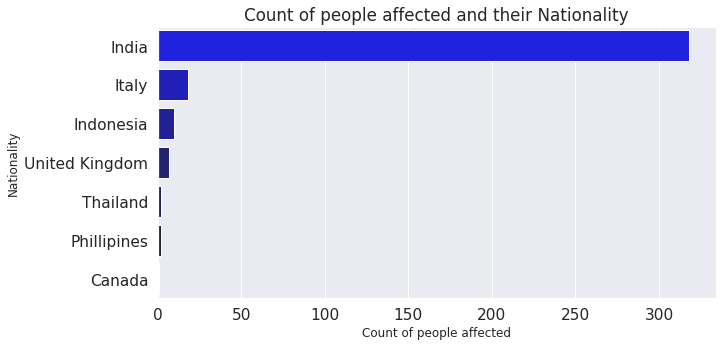

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(data['Nationality'].value_counts().values,data['Nationality'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of people affected and their Nationality')
plt.xlabel('Count of people affected', fontsize=12)
plt.ylabel('Nationality', fontsize=12)
plt.show()

> Graph between gender and count of affected people.

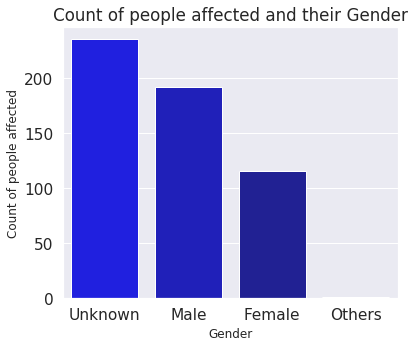

In [18]:
plt.figure(figsize=(6,5))
sns.barplot(data['Gender'].value_counts().index,data['Gender'].value_counts().values, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of people affected and their Gender')
plt.ylabel('Count of people affected', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

> Graph between different states and number of detected cases.

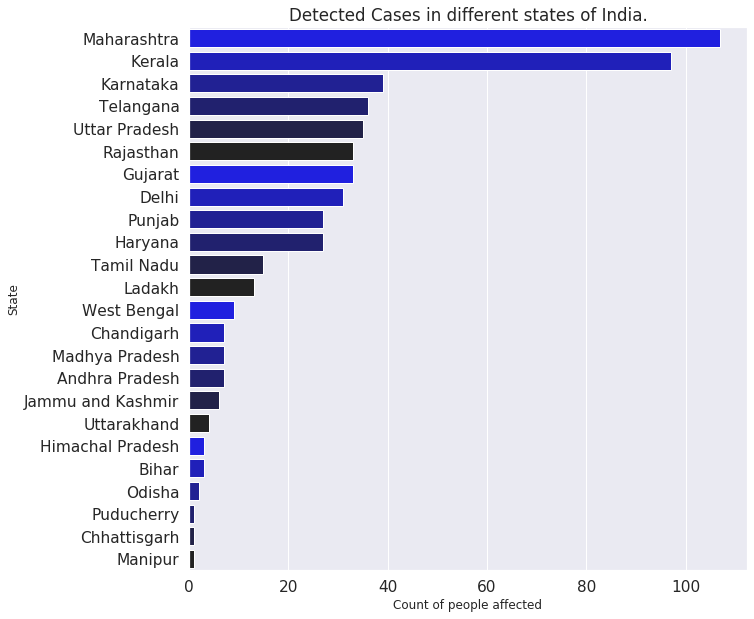

In [19]:
plt.figure(figsize=(10,10))
sns.barplot(data['Detected state'].value_counts().values,data['Detected state'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Detected Cases in different states of India.')
plt.xlabel('Count of people affected', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

> Graph displaying status and count of affected people.

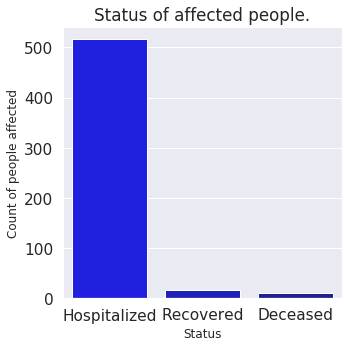

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(data['Current status'].value_counts().index,data['Current status'].value_counts().values, palette=sns.dark_palette("blue", reverse=True))
plt.title('Status of affected people.')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count of people affected', fontsize=12)
plt.show()

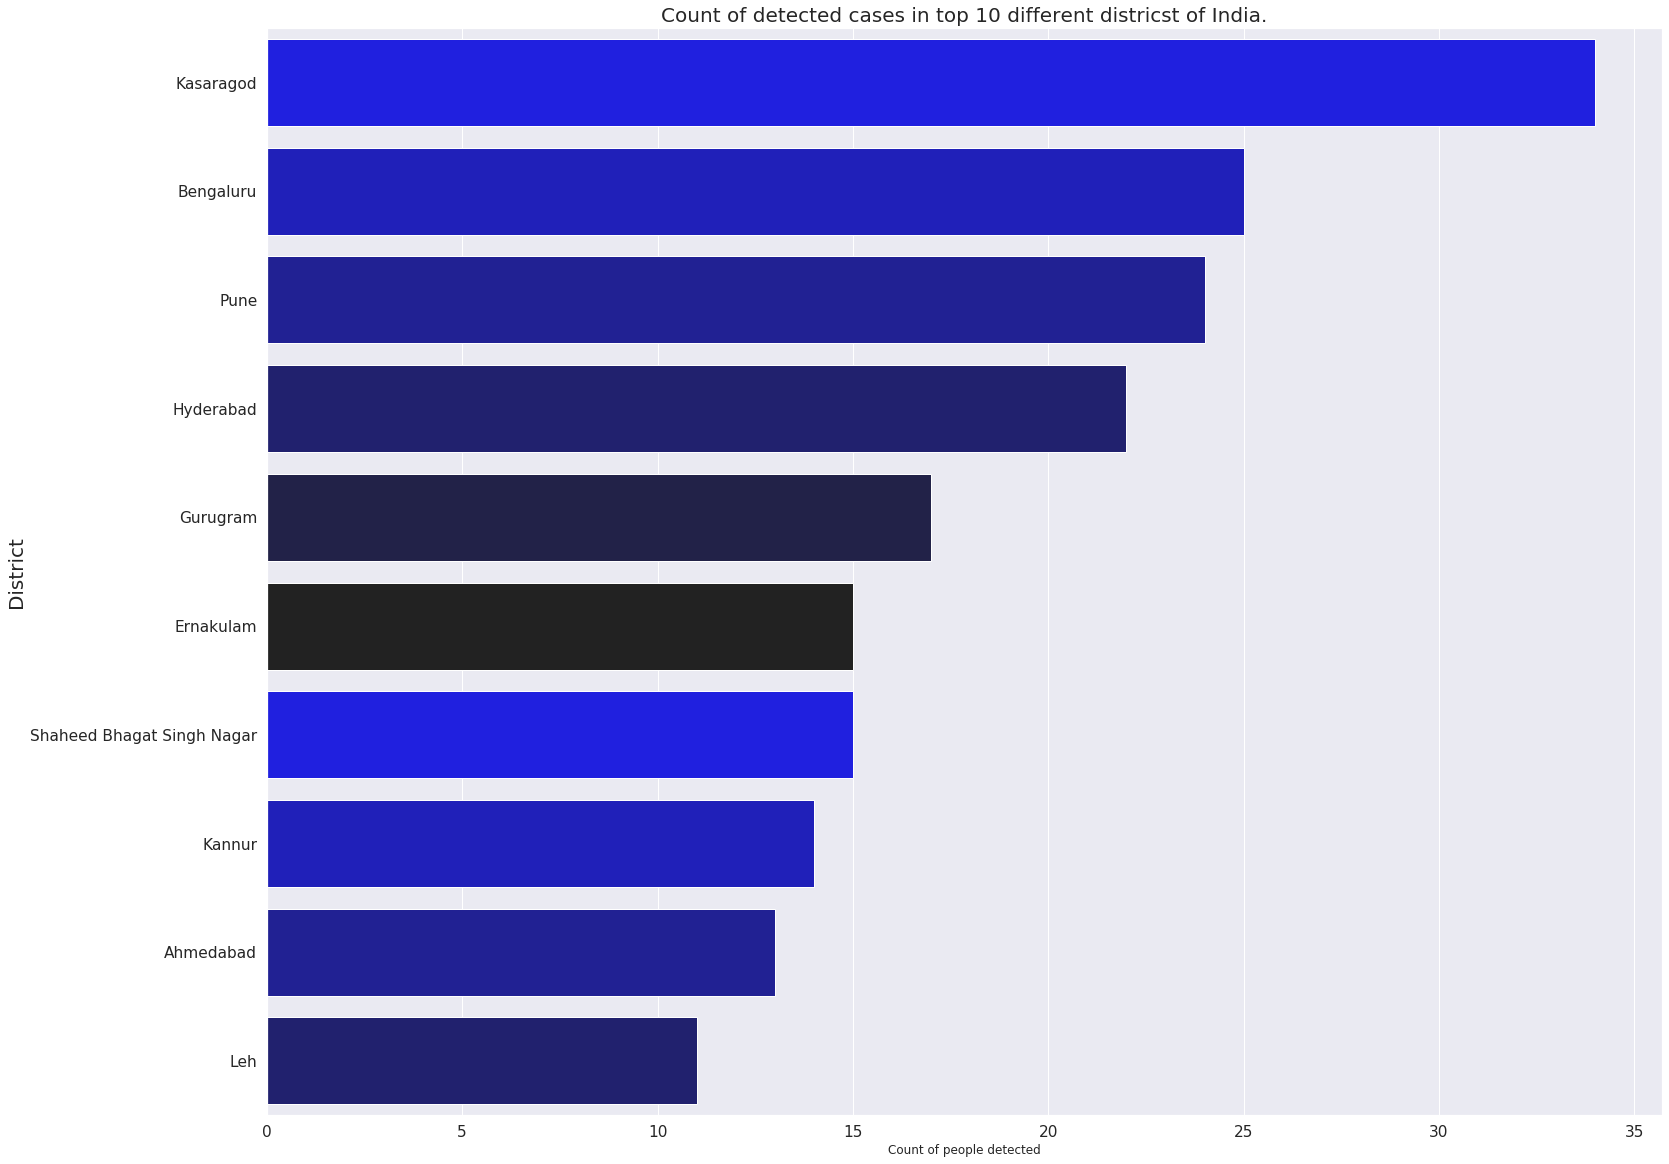

In [21]:
plt.figure(figsize=(25,20))
sns.barplot(data['Detected district'].value_counts()[:10].values,data['Detected district'].value_counts()[:10].index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of detected cases in top 10 different districst of India.',fontsize=20)
plt.xlabel('Count of people detected', fontsize=12)
plt.ylabel('District', fontsize=20)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.show()

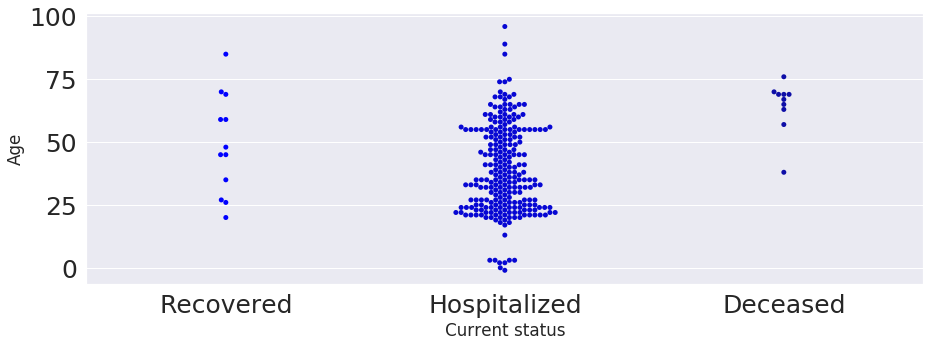

In [22]:
plt.figure(figsize=(15,5))
sns.swarmplot(data['Current status'],data['Age'],palette=sns.dark_palette("blue", reverse=True))


#### No. of days between change in status

In [23]:
data.head()

,Government id,Diagnosed date,Age,Gender,Detected city,Detected city pt,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Current location,Current location pt,Created on,Updated on,Contacts
ID,,,,,,,,,,,,,,,,,
1,KL-TS-P1,30/Jan/2020,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (76.21325419999999 10.5256264),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
2,KL-AL-P1,02/Feb/2020,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (76.333482 9.498000100000001),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
3,KL-KS-P1,03/Feb/2020,NaN,Unknown,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
4,DL-P1,02/Mar/2020,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,03/15/2020,"Travelled from Austria, Italy.\nTravel history...",None,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,"Patient 22:, Patient 23:, Patient 24:, Patient..."
5,TS-P1,02/Mar/2020,NaN,Unknown,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,03/02/2020,"Travelled from Dubai, Singapore contact.\nTrav...",None,SRID=4326;POINT (78.4349398685041 17.4263524),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None


#### Days taken to change status(Hospitalized/Death/Recover)

In [24]:
data['status change difference'] = pd.to_datetime(data['Status change date'])-pd.to_datetime(data['Diagnosed date'])

In [25]:
data['status change difference'].value_counts()

0 days      426
-29 days    100
1 days        3
8 days        3
-1 days       3
11 days       2
12 days       1
13 days       1
2 days        1
3 days        1
9 days        1
15 days       1
10 days       1
Name: status change difference, dtype: int64

### As we can see that many of the dates in the 'Status Change Date' are incorrect due to which the status change difference comes out to be negative.

---

In [26]:
data.drop('status change difference',axis=1,inplace=True
         )

In [27]:
data.head()

,Government id,Diagnosed date,Age,Gender,Detected city,Detected city pt,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Current location,Current location pt,Created on,Updated on,Contacts
ID,,,,,,,,,,,,,,,,,
1,KL-TS-P1,30/Jan/2020,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (76.21325419999999 10.5256264),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
2,KL-AL-P1,02/Feb/2020,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (76.333482 9.498000100000001),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
3,KL-KS-P1,03/Feb/2020,NaN,Unknown,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None
4,DL-P1,02/Mar/2020,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,03/15/2020,"Travelled from Austria, Italy.\nTravel history...",None,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,"Patient 22:, Patient 23:, Patient 24:, Patient..."
5,TS-P1,02/Mar/2020,NaN,Unknown,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,03/02/2020,"Travelled from Dubai, Singapore contact.\nTrav...",None,SRID=4326;POINT (78.4349398685041 17.4263524),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None


In [28]:
data['Transmission info'] = data['Contacts'].apply(lambda x : False if x == None else True)

In [29]:
data.head()

,Government id,Diagnosed date,Age,Gender,Detected city,Detected city pt,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Current location,Current location pt,Created on,Updated on,Contacts,Transmission info
ID,,,,,,,,,,,,,,,,,,
1,KL-TS-P1,30/Jan/2020,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (76.21325419999999 10.5256264),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None,False
2,KL-AL-P1,02/Feb/2020,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (76.333482 9.498000100000001),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None,False
3,KL-KS-P1,03/Feb/2020,NaN,Unknown,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,None,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None,False
4,DL-P1,02/Mar/2020,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,03/15/2020,"Travelled from Austria, Italy.\nTravel history...",None,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,"Patient 22:, Patient 23:, Patient 24:, Patient...",True
5,TS-P1,02/Mar/2020,NaN,Unknown,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,03/02/2020,"Travelled from Dubai, Singapore contact.\nTrav...",None,SRID=4326;POINT (78.4349398685041 17.4263524),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,None,False


In [30]:
data['Transmission info'].value_counts()

False    391
True     153
Name: Transmission info, dtype: int64

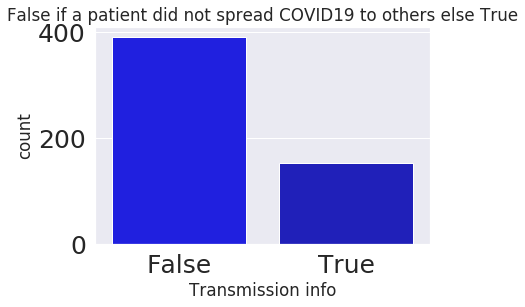

In [31]:
plt.title('False if a patient did not spread COVID19 to others else True')
sns.countplot(data['Transmission info'],palette=sns.dark_palette('blue',reverse=True))

> We can estimate how many people are carriers of COVID19

In [32]:
print("COVID19 estimated to be spread by {} people".format(data['Transmission info'].value_counts()[1]))

COVID19 estimated to be spread by 153 people


In [35]:
diagnose_data=pd.DataFrame({'Dates':pd.to_datetime(data['Diagnosed date']).value_counts().index,
                           'Count':pd.to_datetime(data['Diagnosed date']).value_counts().values})
diagnose_data=diagnose_data.sort_values('Dates')
diagnose_data=diagnose_data.reset_index(drop=True)
diagnose_data=diagnose_data.set_index('Dates')

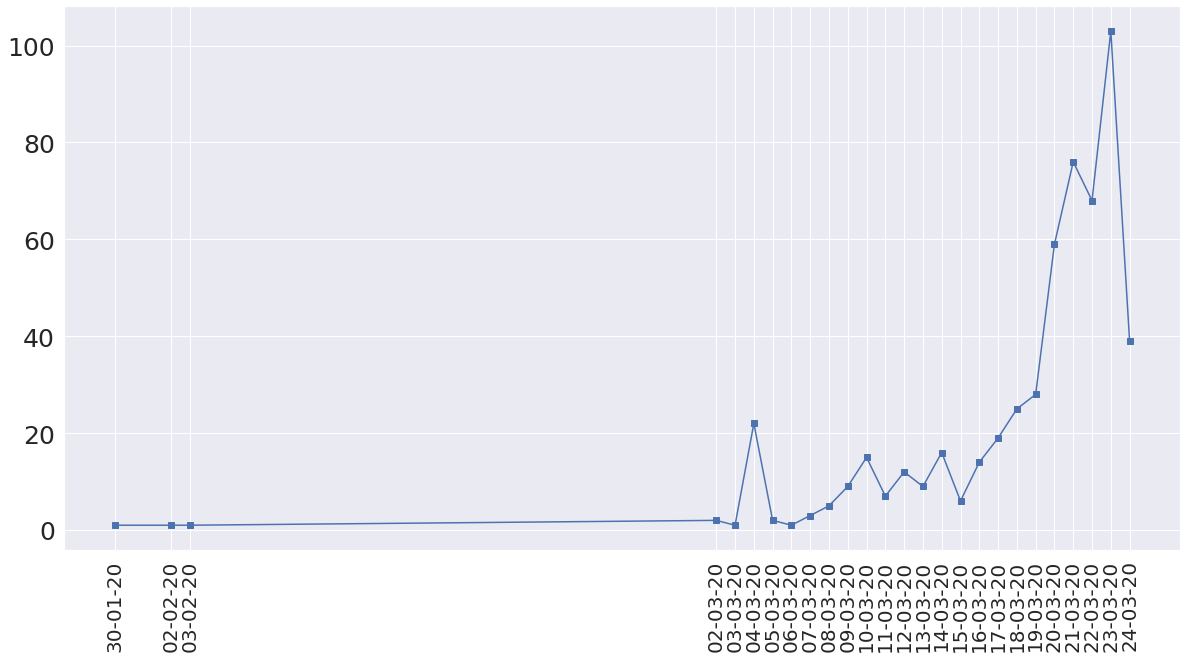

In [36]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20,10))
graph=ax.plot(diagnose_data.Count,marker='s')
myFmt = mdates.DateFormatter('%d-%m-%y')
ax.xaxis.set_major_formatter(myFmt)
plt.rc('xtick',labelsize=20)
plt.xticks(diagnose_data.index.values,rotation=90)
plt.show()

In [38]:
diagnose_data['cumsum']=diagnose_data['Count'].cumsum()

In [39]:
diagnose_data['cumsum']

Dates
2020-01-30      1
2020-02-02      2
2020-02-03      3
2020-03-02      5
2020-03-03      6
2020-03-04     28
2020-03-05     30
2020-03-06     31
2020-03-07     34
2020-03-08     39
2020-03-09     48
2020-03-10     63
2020-03-11     70
2020-03-12     82
2020-03-13     91
2020-03-14    107
2020-03-15    113
2020-03-16    127
2020-03-17    146
2020-03-18    171
2020-03-19    199
2020-03-20    258
2020-03-21    334
2020-03-22    402
2020-03-23    505
2020-03-24    544
Name: cumsum, dtype: int64

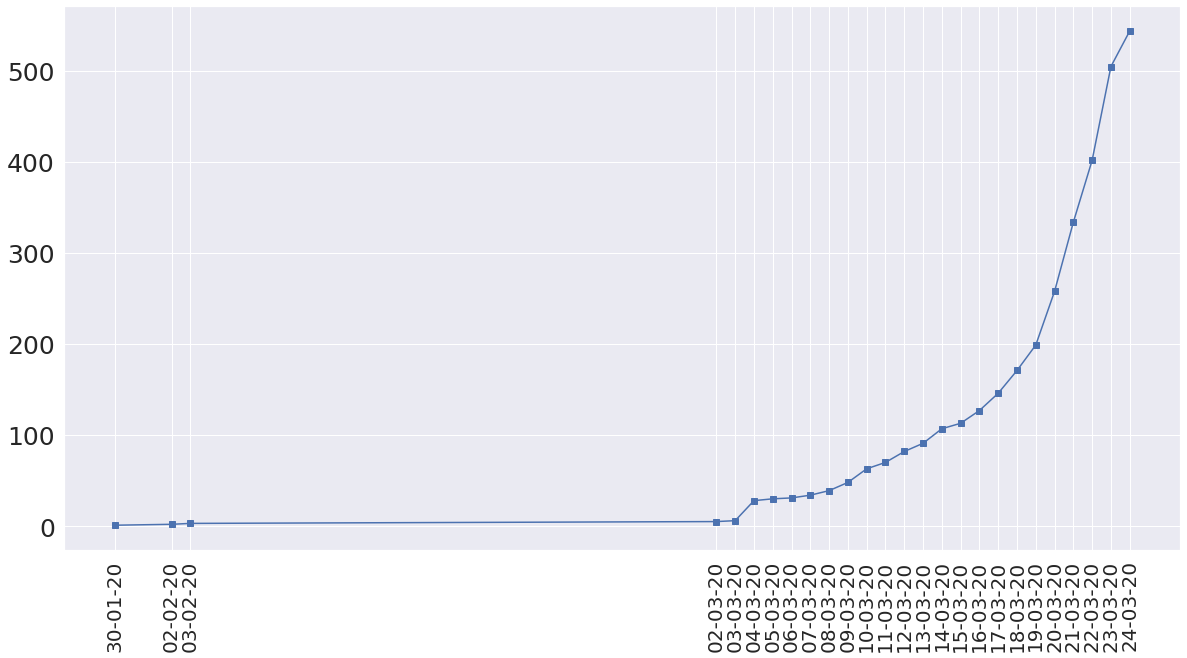

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
graph=ax.plot(diagnose_data['cumsum'],marker='s')
myFmt = mdates.DateFormatter('%d-%m-%y')
ax.xaxis.set_major_formatter(myFmt)
plt.rc('xtick',labelsize=20)
plt.xticks(diagnose_data.index.values,rotation=90)
plt.show()